# ASSIGNMENT - 2 (**MNIST Handwritten Digit Classification bold text**)
DEEP LEARNING - PGD-DSAI-BATCH-5
ANWAR SIRAJ

**Develop a Convolutional Neural Network (CNN) From Scratch for  MNIST Handwritten Digit Classification.**

Although the dataset is effectively solved, it can be used as the basis for learning and practicing
**how to develop, evaluate, and use convolutional deep learning neural networks for image classification from scratch**.
This includes **how to develop a robust test harness** for estimating the performance of the model, **how to explore improvements to the model**, and **how to save the model and later load it to make predictions on new data.**

In [ ]:
# Import Important/necessary Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Loading and Preprocessing the MNIST Dataset
# This code snippet demonstrates the process of loading and preprocessing the MNIST dataset for image classification tasks.

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to include the channel dimension and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Building a Convolutional Neural Network (CNN) for Image Classification
# This code defines a convolutional neural network (CNN) architecture for image classification tasks, specifically designed for the MNIST dataset of handwritten digits.

model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes for digits 0-9

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Configuring the Model for Training
# This code snippet configures the compiled model for training.

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Implementing Early Stopping with Model Checkpointing
# This code snippet utilizes two essential callbacks for model training: (1) ModelCheckpoint , (2) Early Stopping (indirectly)

from tensorflow.keras.callbacks import ModelCheckpoint

# Set up the checkpoint callback with the .keras extension
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model with the updated checkpoint callback
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[checkpoint])

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 66ms/step - accuracy: 0.8246 - loss: 0.5759 - val_accuracy: 0.9707 - val_loss: 0.0987
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 69ms/step - accuracy: 0.9721 - loss: 0.0898 - val_accuracy: 0.9750 - val_loss: 0.0803
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 65ms/step - accuracy: 0.9825 - loss: 0.0583 - val_accuracy: 0.9802 - val_loss: 0.0651
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.9857 - loss: 0.0430 - val_accuracy: 0.9766 - val_loss: 0.0806
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 65ms/step - accuracy: 0.9895 - loss: 0.0342 - val_accuracy: 0.9861 - val_loss: 0.0479
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 63ms/step - accuracy: 0.9918 - loss: 0.0280 - val_accuracy: 0.9860 - val_loss: 0.0470
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 64ms/step - accuracy: 0.9921 - loss: 0.0244 - val_accuracy: 0.9850 - val_loss: 0.0539
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.9936 - loss: 0.0180 - 

In [ ]:
# Evaluating Model Performance on Test Data
# Load the best model (optional, if not using the checkpoint callback)
# model.load_weights('best_model.h5')


test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9786 - loss: 0.0844
Test loss: 0.0700
Test accuracy: 0.9813


In [ ]:
# Saving and Loading the Trained Model
# Save the entire model
model.save('mnist_cnn_model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('mnist_cnn_model.h5')

In [ ]:
# Making Predictions with the Loaded Model

# Make predictions
predictions = loaded_model.predict(x_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [ ]:
# Importing Matplotlib for Plotting
# The code import matplotlib.pyplot as plt imports the pyplot module from the matplotlib library and assigns it the alias plt.

import matplotlib.pyplot as plt

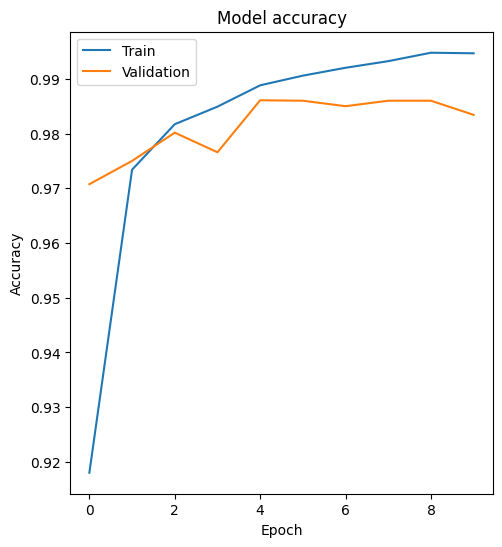

In [ ]:
# Visualizing Model Training History: Accuracy
# Plot training & validation accuracy values

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])


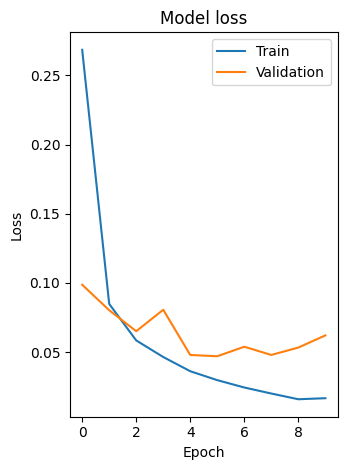

In [ ]:
# Visualizing Model Training History: Loss (This code creates the second subplot within the figure generated previously and visualizes the training and validation loss of the model over epochs.)
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()


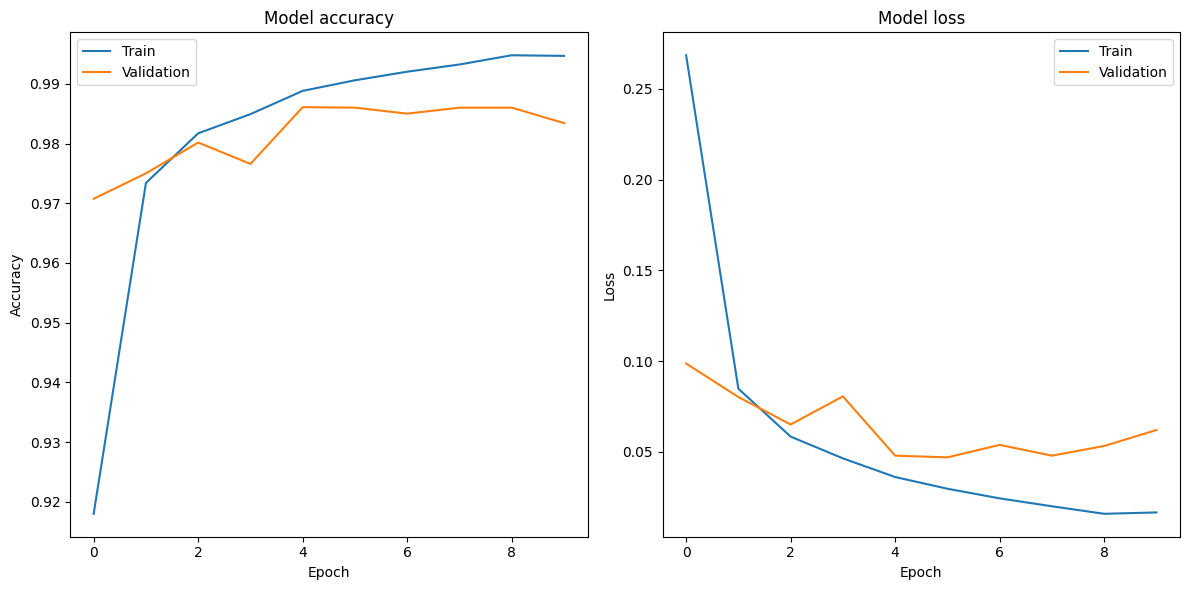

In [ ]:
# Visualizing Model Training History: Accuracy and Loss: (This title accurately conveys the purpose of the code, which is to create a visualization of both the model's accuracy and loss curves during training. It's concise and informative, making it a good choice to keep.)
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()